# Explore here

In [1]:
# Your code here
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dup=data.duplicated().sum()
print(dup)

1


In [7]:
registros_dup=data[data.duplicated(keep=False)]
registros_dup

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

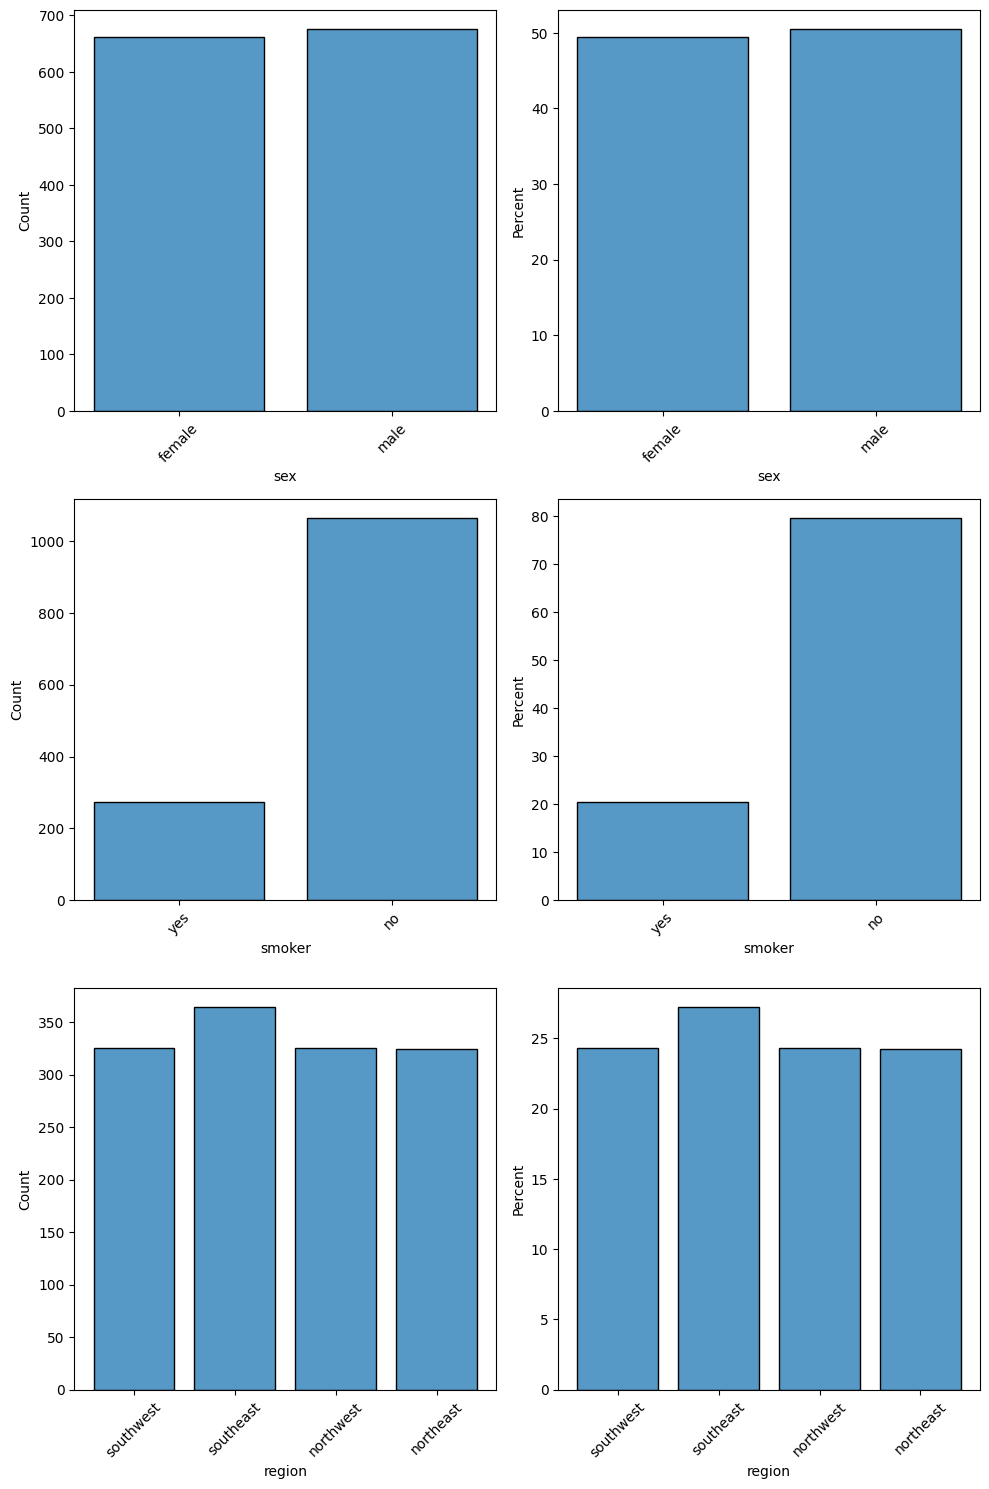

In [10]:
# Analisis de Variables categoricas 

fig, axis = plt.subplots(3, 2, figsize = (10, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "sex", shrink=.8)
sns.histplot(ax = axis[0, 1], data = data, x = "sex", stat="percent", shrink=.8)
sns.histplot(ax = axis[1, 0], data = data, x = "smoker", shrink=.8)
sns.histplot(ax = axis[1, 1], data = data, x = "smoker", stat="percent", shrink=.8)
sns.histplot(ax = axis[2, 0], data = data, x = "region", shrink=.8)
sns.histplot(ax = axis[2, 1], data = data, x = "region", stat="percent", shrink=.8)




# Rotar las etiquetas
for ax in axis.flat:
    ax.tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()



# Mostrar el plot
plt.show()

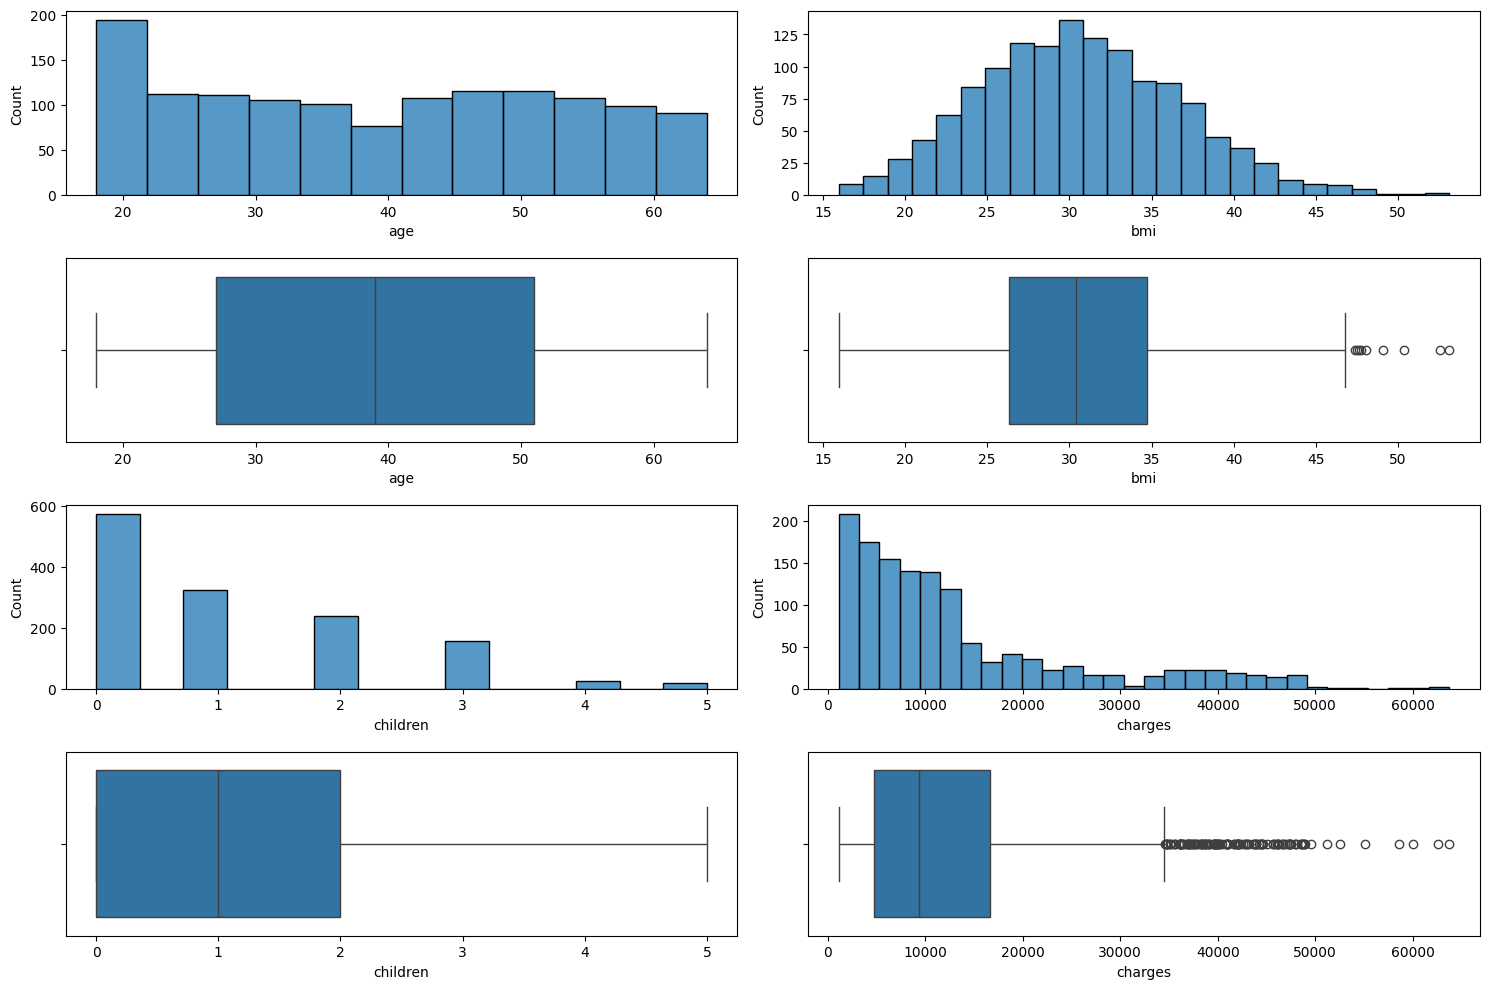

In [11]:
# Analisis de variables numericas

fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax = axis[3, 0], data = data, x = "children")
sns.histplot(ax = axis[2, 1], data = data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = data, x = "charges")


# Ajustar el layout
plt.tight_layout()
# fig.delaxes(axis[2, 1])
# fig.delaxes(axis[3, 1])

# Mostrar el plot
plt.show()

In [12]:
# Factorizar
data["sex_f"] = pd.factorize(data["sex"])[0]
data["smoker_f"] = pd.factorize(data["smoker"])[0]
data["region_f"] = pd.factorize(data["region"])[0]


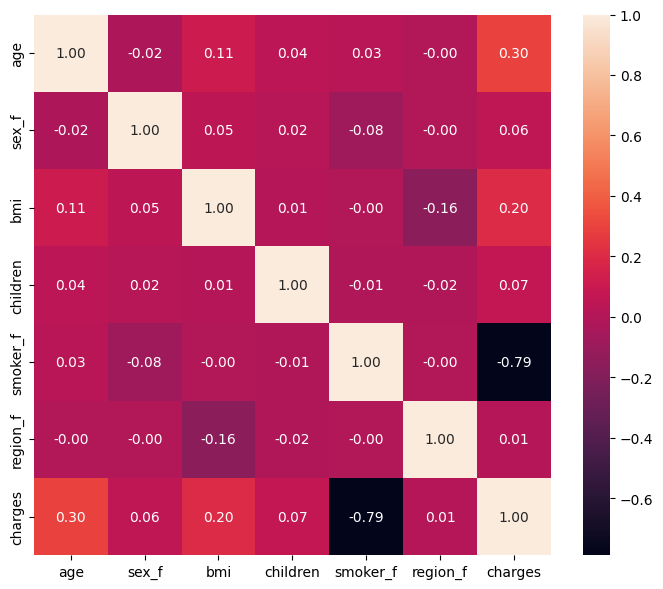

In [13]:
fig, axis = plt.subplots(figsize = (7, 6))
matriz_corr=data[['age','sex_f','bmi','children','smoker_f','region_f','charges']].corr()

#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

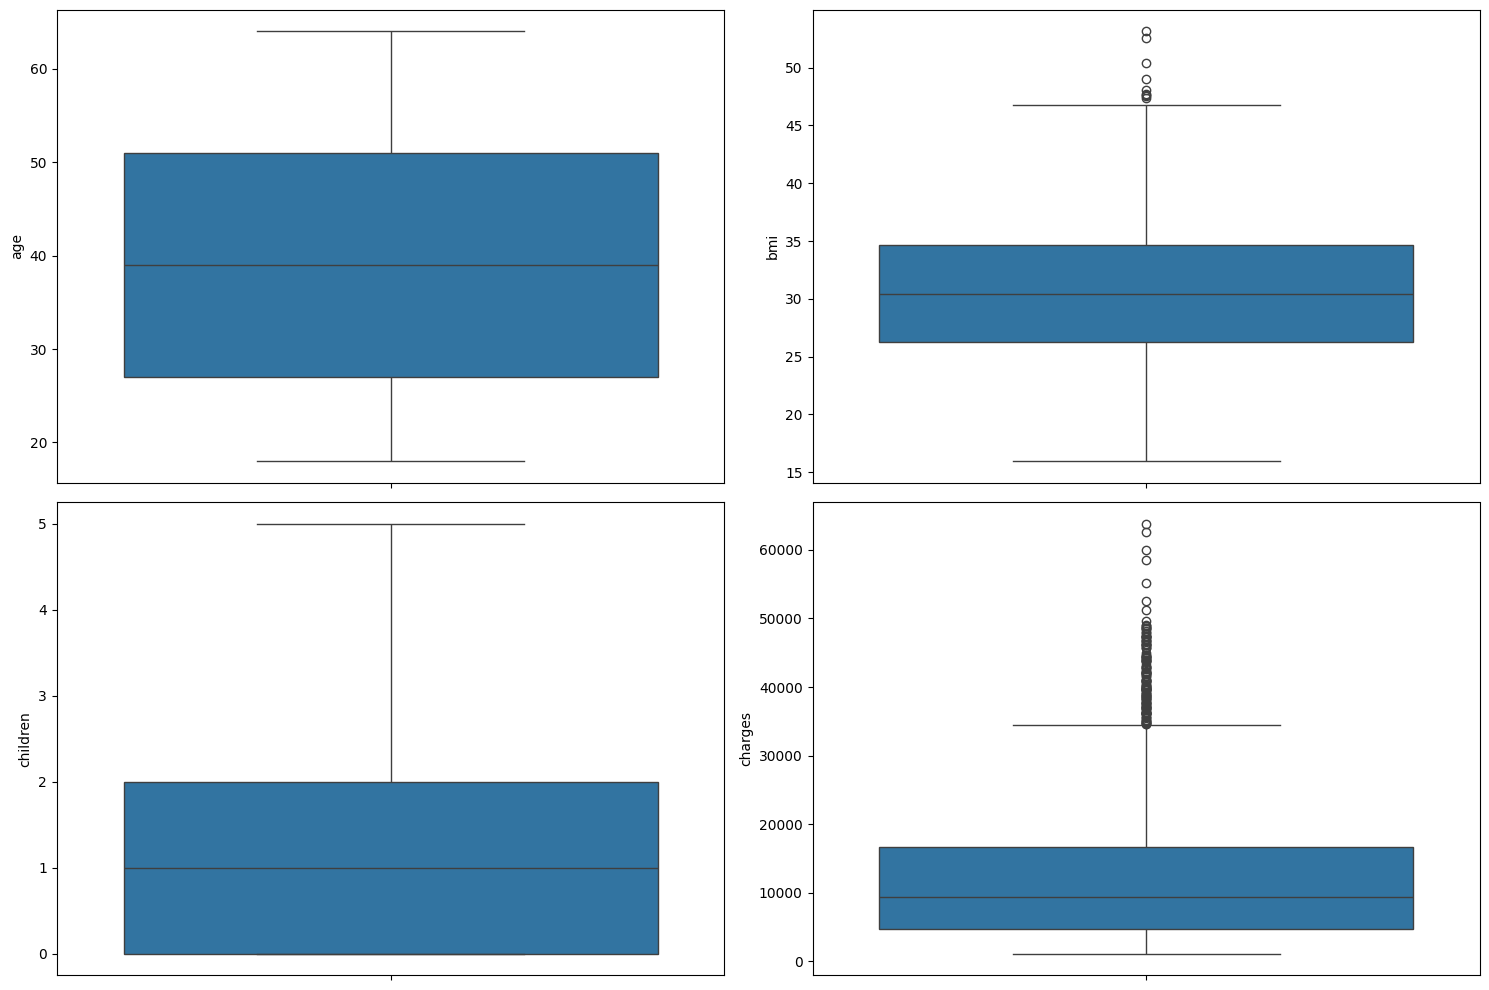

In [15]:
# Revision de Datos Atipicos
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "age")
sns.boxplot(ax = axis[0, 1], data = data, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = data, y = "children")
sns.boxplot(ax = axis[1, 1], data = data, y = "charges")


plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
num_variables = ['age','sex_f','bmi','children','smoker_f','region_f',"charges"]

In [18]:
# Escalamos el modelo

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal =pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,age,sex_f,bmi,children,smoker_f,region_f,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


In [22]:
# Dividimos la muestra con respecto a la variable objetivo
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = data_scal.drop("charges", axis = 1)
y = data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)



X_train.head()

,age,sex_f,bmi,children,smoker_f,region_f
196,0.456522,0.0,0.453054,0.0,1.0,0.000000
1209,0.891304,1.0,0.568738,0.2,1.0,0.000000
353,0.326087,1.0,0.518832,0.0,1.0,1.000000
461,0.521739,1.0,0.377724,0.0,0.0,0.000000
629,0.565217,0.0,0.618510,0.0,0.0,0.666667


In [26]:
# Seleccion de mejores variables para hacer las predicciones con el modelo

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

# selected_columns = X_train.columns[selection_model.get_support()]
# X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
# X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)


ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,age,bmi,children,smoker_f
0,0.456522,0.453054,0.0,1.0
1,0.891304,0.568738,0.2,1.0
2,0.326087,0.518832,0.0,1.0
3,0.521739,0.377724,0.0,0.0
4,0.565217,0.618510,0.0,0.0


In [27]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Modelo de Regresion Lineal

In [38]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_f,charges
0,0.456522,0.453054,0.0,1.0,0.072274
1,0.891304,0.568738,0.2,1.0,0.179179
2,0.326087,0.518832,0.0,1.0,0.180100
3,0.521739,0.377724,0.0,0.0,0.335557
4,0.565217,0.618510,0.0,0.0,0.668197


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3217565128883093
Coefficients (b1, b2): [ 0.19053161 -0.00421102  0.19172529  0.03551561 -0.38170988  0.01495398]


In [41]:
y_pred = model.predict(X_test)
y_pred

array([ 0.1285722 ,  0.0970942 ,  0.5786093 ,  0.13356173,  0.41397952,
        0.14816888, -0.01203094,  0.24953028,  0.00328075,  0.1611782 ,
        0.43209283,  0.13073947,  0.06800075,  0.59593662,  0.6252391 ,
        0.57538649,  0.22546278,  0.56057926,  0.13047119,  0.49162748,
        0.0413002 ,  0.13942185,  0.01446006,  0.09456265,  0.16659112,
        0.19035516,  0.21273565,  0.08308571,  0.14420643,  0.01396164,
        0.12839153,  0.19338633,  0.05499628,  0.0416099 ,  0.0484939 ,
        0.18561743,  0.01342593,  0.12260297,  0.52179806,  0.5034303 ,
        0.04490218,  0.04885864,  0.20688145,  0.1646282 ,  0.1192345 ,
        0.17228446,  0.06779119,  0.03336821,  0.55060219,  0.12456781,
        0.23633596,  0.01709305,  0.17956723,  0.00322132,  0.19348541,
        0.18084232,  0.04949511,  0.49773321,  0.19413553,  0.18915326,
        0.20814   ,  0.14903449,  0.23913405,  0.11018153,  0.17276087,
        0.04999069,  0.40862351,  0.15680755,  0.01992413,  0.07

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.008255813330902523
R2 Score: 0.7651213280845759


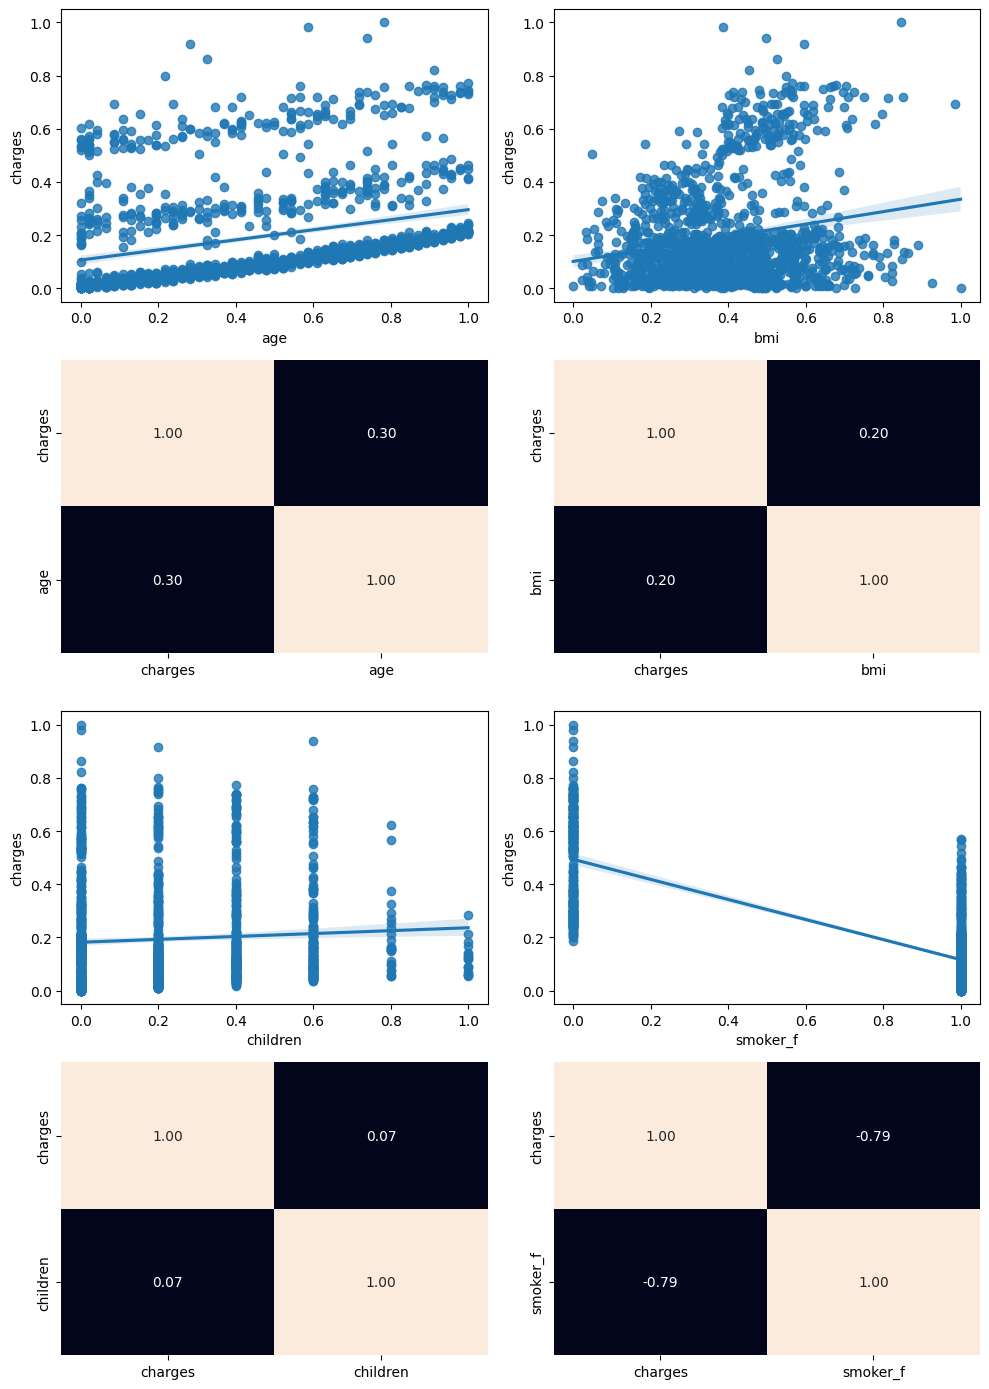

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_f", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_f"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()